<a href="https://colab.research.google.com/github/ja390/Parallel-Computing-Assignment3/blob/main/performance_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

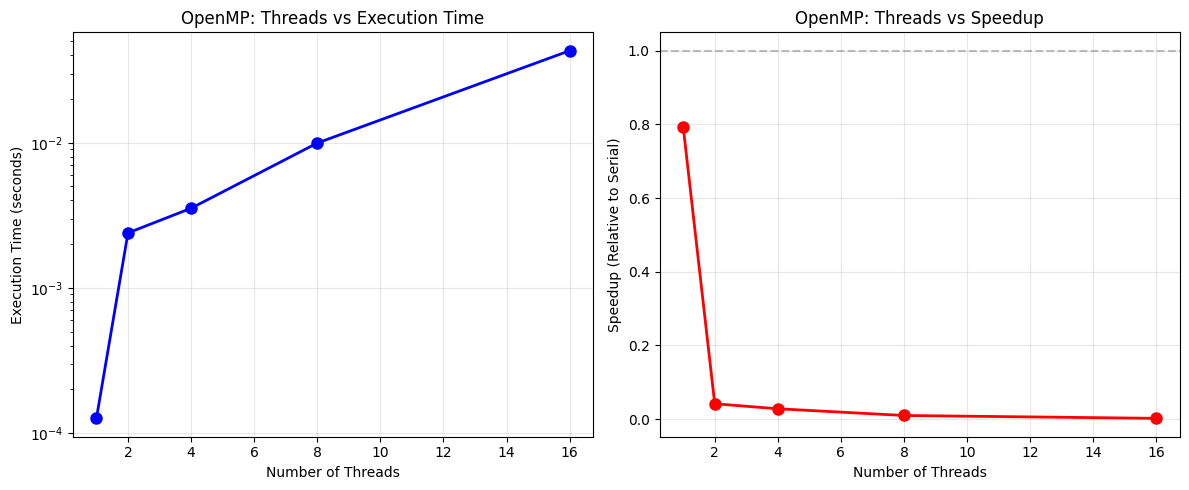

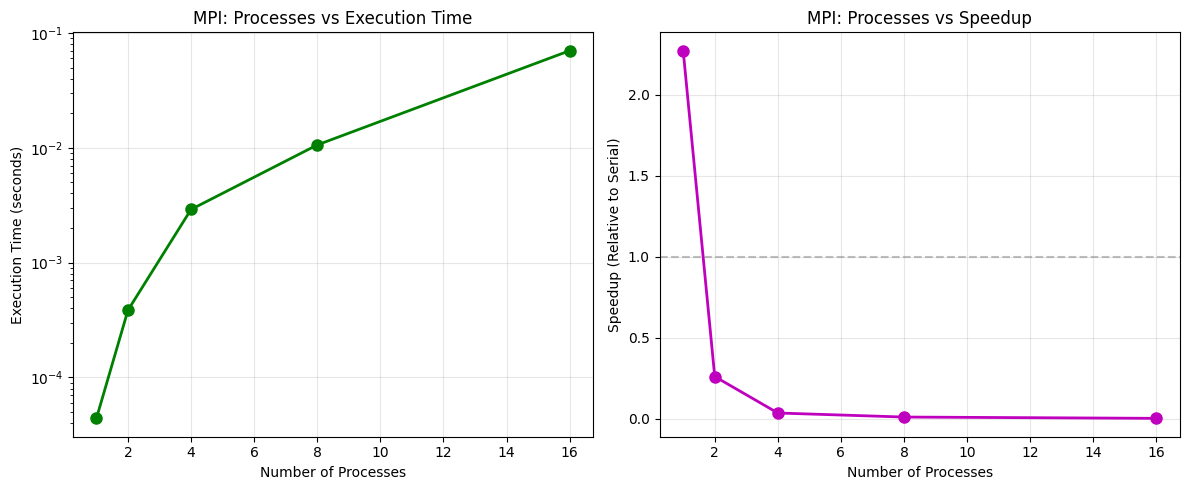

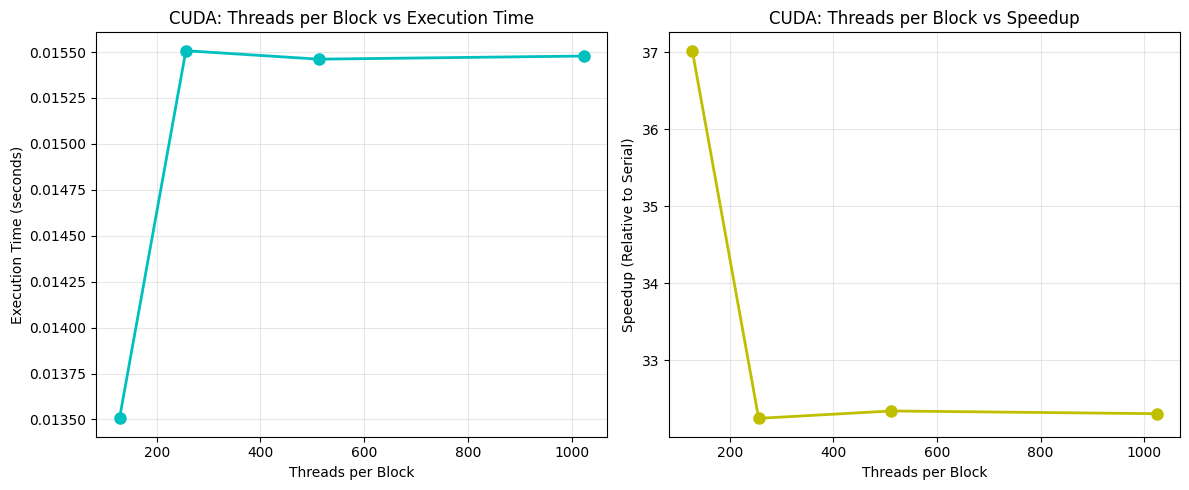

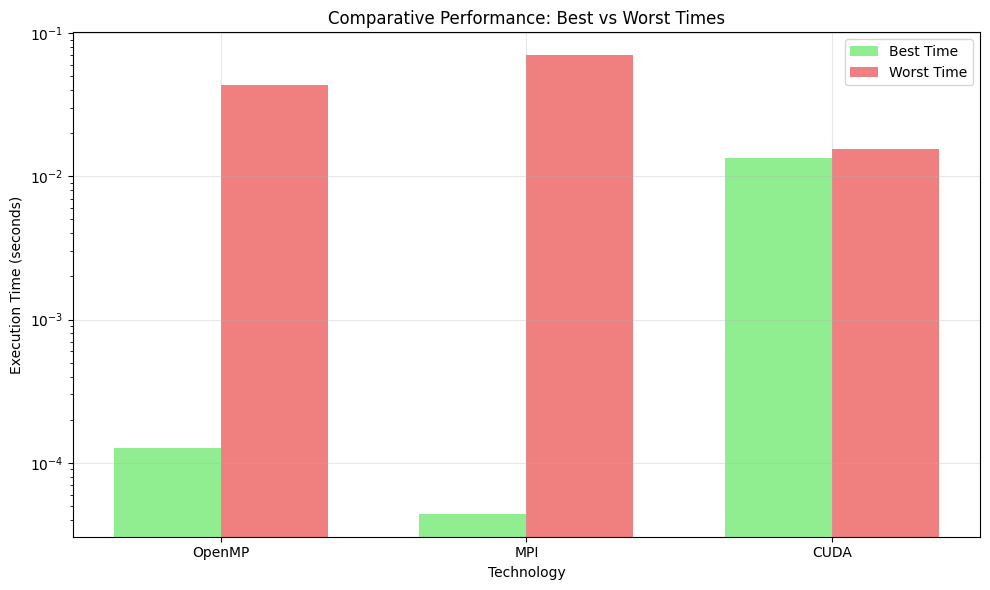

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your runs
openmp_threads = [1, 2, 4, 8, 16]
openmp_times = [0.000126, 0.002390, 0.003536, 0.009953, 0.043097]

mpi_processes = [1, 2, 4, 8, 16]
mpi_times = [0.000044, 0.000385, 0.002905, 0.010588, 0.070056]

cuda_threads = [128, 256, 512, 1024]
cuda_times = [0.013506, 0.015507, 0.015461, 0.015478]

# Create OpenMP graphs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(openmp_threads, openmp_times, 'bo-', linewidth=2, markersize=8)
plt.title('OpenMP: Threads vs Execution Time')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (seconds)')
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale for better visualization

plt.subplot(1, 2, 2)
serial_time = 0.0001  # Estimated serial time
speedup = [serial_time/t for t in openmp_times]
plt.plot(openmp_threads, speedup, 'ro-', linewidth=2, markersize=8)
plt.title('OpenMP: Threads vs Speedup')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup (Relative to Serial)')
plt.grid(True, alpha=0.3)
plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('openmp_performance.png', dpi=300, bbox_inches='tight')
plt.show()

# Create MPI graphs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(mpi_processes, mpi_times, 'go-', linewidth=2, markersize=8)
plt.title('MPI: Processes vs Execution Time')
plt.xlabel('Number of Processes')
plt.ylabel('Execution Time (seconds)')
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.subplot(1, 2, 2)
speedup_mpi = [serial_time/t for t in mpi_times]
plt.plot(mpi_processes, speedup_mpi, 'mo-', linewidth=2, markersize=8)
plt.title('MPI: Processes vs Speedup')
plt.xlabel('Number of Processes')
plt.ylabel('Speedup (Relative to Serial)')
plt.grid(True, alpha=0.3)
plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('mpi_performance.png', dpi=300, bbox_inches='tight')
plt.show()

# Create CUDA graphs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cuda_threads, cuda_times, 'co-', linewidth=2, markersize=8)
plt.title('CUDA: Threads per Block vs Execution Time')
plt.xlabel('Threads per Block')
plt.ylabel('Execution Time (seconds)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
serial_large = 0.5  # Estimated serial time for 10,000 points
speedup_cuda = [serial_large/t for t in cuda_times]
plt.plot(cuda_threads, speedup_cuda, 'yo-', linewidth=2, markersize=8)
plt.title('CUDA: Threads per Block vs Speedup')
plt.xlabel('Threads per Block')
plt.ylabel('Speedup (Relative to Serial)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('cuda_performance.png', dpi=300, bbox_inches='tight')
plt.show()

# Create comparative graph
plt.figure(figsize=(10, 6))

# Normalize data for comparison
tech_names = ['OpenMP', 'MPI', 'CUDA']
best_times = [min(openmp_times), min(mpi_times), min(cuda_times)]
worst_times = [max(openmp_times), max(mpi_times), max(cuda_times)]

x = np.arange(len(tech_names))
width = 0.35

plt.bar(x - width/2, best_times, width, label='Best Time', color='lightgreen')
plt.bar(x + width/2, worst_times, width, label='Worst Time', color='lightcoral')
plt.xlabel('Technology')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparative Performance: Best vs Worst Times')
plt.xticks(x, tech_names)
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.savefig('comparative_performance.png', dpi=300, bbox_inches='tight')
plt.show()